In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import proplot as plot

In [2]:
#varname='tas_2m'
varname='pr'

### Read in WACCM Skill File

In [3]:
waccm_model='70Lwaccm6'
waccm_base_path='/glade/scratch/kpegion/ESPWG/data/'
waccm_skill_file=waccm_base_path+waccm_model+'/hcst/skill/'+waccm_model+'.'+varname+'.acc.emean.DJF.1999-2015.nc'

In [4]:
waccm_ds=xr.open_dataset(waccm_skill_file)
waccm_varname=list(waccm_ds.keys())
waccm_ds

<xarray.Dataset>
Dimensions:  (lat: 181, lead: 4, lon: 360)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lead     (lead) int64 1 2 3 4
Data variables:
    pr       (lead, lat, lon) float64 ...
Attributes:
    prediction_skill:              calculated by climpred https://climpred.re...
    skill_calculated_by_function:  compute_hindcast
    number_of_initializations:     219
    metric:                        pearson_r
    comparison:                    e2o
    dim:                           time
    units:                         None
    created:                       2020-04-23 18:49:27

### Read in CESML46 Skill from fille I transferred over from COLA

In [5]:
cesm1_base_path='/glade/scratch/kpegion/ESPWG/data/30LCESM/skill/'
#cesm1_skill_file=cesm1_base_path+'skill.accrmse.30LCESM1-CESM.CPC-TEMP.tas2m.12-2.nc'
cesm1_skill_file=cesm1_base_path+'skill.accrmse.30LCESM1-CESM.CPC-PRECIP.prsfc.12-2.nc'

In [6]:
cesm1_ds=xr.open_dataset(cesm1_skill_file)
cesm1_ds

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 5)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1960-01-02 1960-01-03 ... 1960-01-06
Data variables:
    acc      (time, lat, lon) float32 ...
    rmse     (time, lat, lon) float32 ...
Attributes:
    title:         SubX Anomalies
    long_title:    SubX Anomalies
    comments:      SubX project http://cola.gmu.edu/~kpegion/subx/
    institution:   IRI
    source:        SubX IRI
    CreationDate:  2019/08/01 17:38:08
    CreatedBy:     kpegion
    MatlabSource:

### Read in CESM1 file I calculated on Casper

In [7]:
cesm1b_model='CESM1_30LCAM5'
cesm1b_base_path='/glade/scratch/kpegion/ESPWG/data/'
cesm1b_skill_file=cesm1b_base_path+cesm1b_model+'/hcst/skill/'+cesm1b_model+'.'+varname+'.acc.emean.DJF.1999-2015.nc'

In [8]:
cesm1b_ds=xr.open_dataset(cesm1b_skill_file)
cesm1b_ds

<xarray.Dataset>
Dimensions:  (lat: 181, lead: 6, lon: 360)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lead     (lead) int64 1 2 3 4 5 6
Data variables:
    pr       (lead, lat, lon) float64 ...
Attributes:
    prediction_skill:              calculated by climpred https://climpred.re...
    skill_calculated_by_function:  compute_hindcast
    number_of_initializations:     220
    metric:                        pearson_r
    comparison:                    e2o
    dim:                           time
    units:                         None
    created:                       2020-04-27 14:35:10

### Plot Skill for WACCM and CESM146L

In [9]:
# Colors
cmap='ColdHot'
oceancolor='blue'

# Mapping and grid region
projection='pcarree'
lon_0=180

# Colorbar
extend='both'
cbar_loc='b'
cbar_size=0.8

# Font sizes & format
clabel_fsize=6
clabel_format='%r'
small_font=6
large_font=8


# Mapping and Grid region
latreg=(-70,90)
lon_labels=[-120.0,180,120]
lat_labels=[-60,-40,-20,0,20,40,60]


# Levels
clevs=np.arange(-1,1.01,0.1)
clevs=[-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

# Layout
plot_grid=[[1,2],
           [3,4],
           [5,6],
           [7,8]]

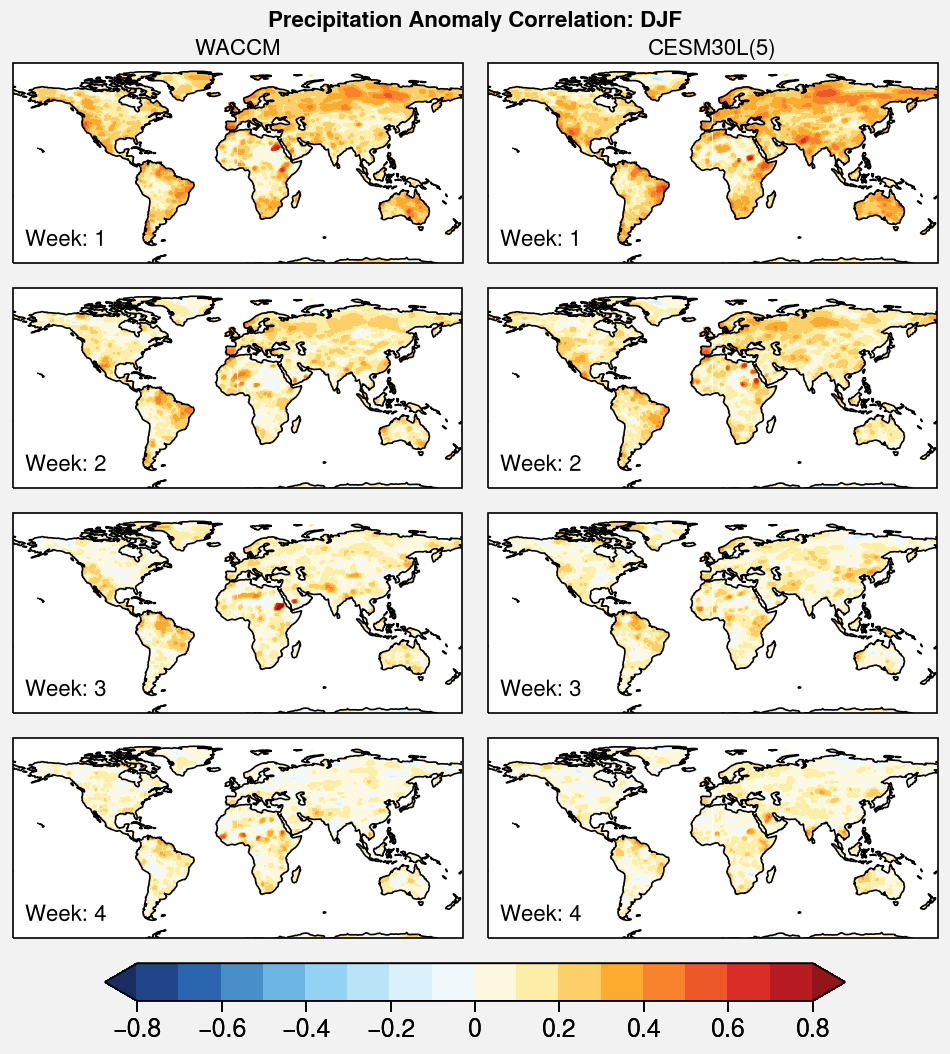

In [10]:
f, axs = plot.subplots(plot_grid,proj='pcarree')
suptitle='Precipitation Anomaly Correlation: DJF'

ic=0
for iweek in np.arange(4):

    lltitle='Week: '+str(iweek+1)

    # WACCM
    
    if (ic==0):
        title='WACCM'
    else:
        title=''
        
    #data, lons = add_cyclic_point(, coord=waccm_ds['lon'])
    m1=axs[ic].contourf(waccm_ds['lon'],waccm_ds['lat'],
                       waccm_ds[waccm_varname[0]][iweek,:,:],levels=clevs,
                       cmap=cmap, extend='both')

    axs[ic].format(coast=True,title=title,geogrid=False,grid=False,
                      latlim=latreg,lltitle=lltitle,small=small_font,large=large_font)
  
    # CESM1 -- calculated on Casper (5-member ensemble)
    ic=ic+1
    
    if (ic==1):
        title='CESM30L(5)'
    else:
        title=''
        
    m3=axs[ic].contourf(cesm1b_ds['lon'],cesm1b_ds['lat'],
                       cesm1b_ds[waccm_varname[0]][iweek,:,:],levels=clevs,
                       cmap=cmap, extend='both')

    axs[ic].format(coast=True,title=title,geogrid=False,grid=False,
                   latlim=latreg,suptitle=suptitle,
                   lltitle=lltitle,small=small_font,large=large_font)

    ic=ic+1
# Colorbar
f.colorbar(m1,loc=cbar_loc,length=cbar_size)

fname=varname+'_Weekly.png'
plt.savefig(fname)

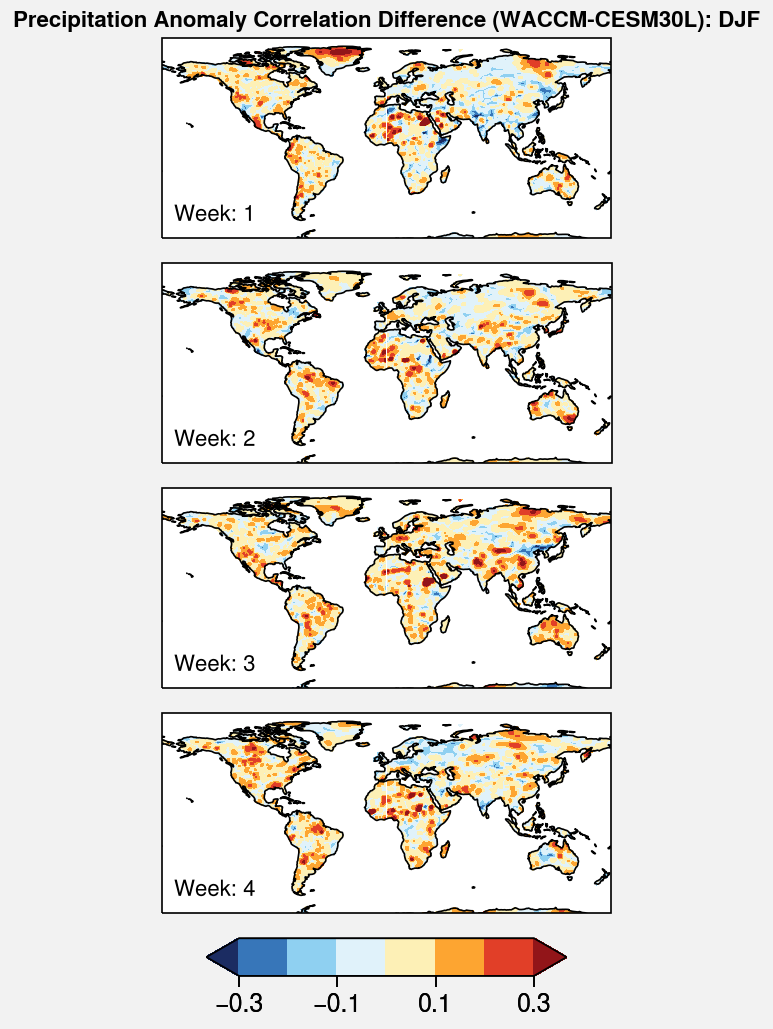

In [11]:
# Layout
#plot_grid=[[1],
#           [2],
#           [3],
#           [4]]
clevs=[-0.3,-0.2,-0.1,0,0.1,0.2,0.3,]

f, axs = plot.subplots(nrows=4,proj='pcarree')
suptitle='Precipitation Anomaly Correlation Difference (WACCM-CESM30L): DJF'

ic=0
for iweek in np.arange(4):

    lltitle='Week: '+str(iweek+1)

    #data, lons = add_cyclic_point(, coord=waccm_ds['lon'])
    m1=axs[iweek].contourf(waccm_ds['lon'],waccm_ds['lat'],
                       waccm_ds[waccm_varname[0]][iweek,:,:]-cesm1b_ds[waccm_varname[0]][iweek,:,:],
                       levels=clevs,
                       cmap=cmap, extend='both')

    axs[iweek].format(coast=True,title=title,geogrid=False,grid=False,
                      latlim=latreg,suptitle=suptitle,lltitle=lltitle,small=small_font,large=large_font)
  
# Colorbar
f.colorbar(m1,loc=cbar_loc,length=cbar_size)

fname=varname+'_WeeklyDiffs.png'
plt.savefig(fname)

In [12]:
waccm_na_corr=waccm_ds.sel(lat=slice(15,75),lon=slice(190,305)).mean(dim=['lat','lon'])
cesm1_na_corr=cesm1_ds.sel(lat=slice(15,75),lon=slice(190,305)).mean(dim=['lat','lon'])
cesm1b_na_corr=cesm1b_ds.sel(lat=slice(15,75),lon=slice(190,305)).mean(dim=['lat','lon'])

print(waccm_na_corr)
print(cesm1_na_corr)
print(cesm1b_na_corr)

<xarray.Dataset>
Dimensions:  (lead: 4)
Coordinates:
  * lead     (lead) int64 1 2 3 4
Data variables:
    pr       (lead) float64 0.1483 0.06861 0.03501 0.02572
<xarray.Dataset>
Dimensions:  (time: 5)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-02 1960-01-03 ... 1960-01-06
Data variables:
    acc      (time) float32 0.47107607 0.21173783 ... 0.04883555 0.084381446
    rmse     (time) float32 1.3697077 1.3618705 1.3445407 1.3294437 1.0130357
<xarray.Dataset>
Dimensions:  (lead: 6)
Coordinates:
  * lead     (lead) int64 1 2 3 4 5 6
Data variables:
    pr       (lead) float64 0.1532 0.08903 0.04156 0.01518 0.01202 0.02368


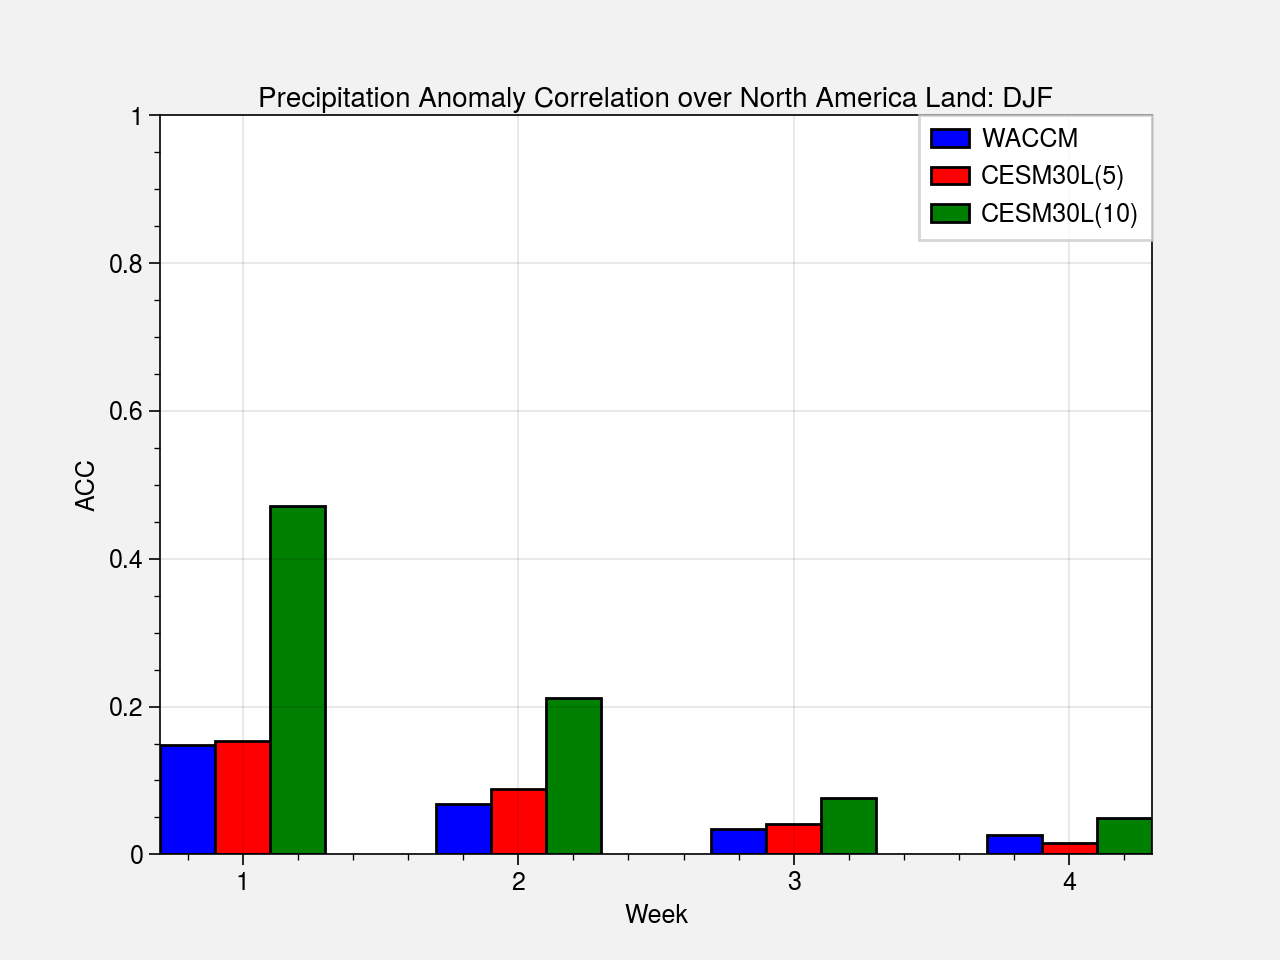

In [13]:
x=np.arange(0,4)
x2=x+0.2
x3=x2+0.2
xlab=['1','2','3','4']

plt.bar(x,waccm_na_corr[waccm_varname[0]][0:4],width=0.2,ec='k',color='b',align='center')
plt.bar(x2,cesm1b_na_corr[waccm_varname[0]][0:4],width=0.2,ec='k',color='r',align='center')
plt.bar(x3,cesm1_na_corr['acc'][0:4],width=0.2,ec='k',color='g',align='center')

plt.xticks(x2,xlab)
plt.ylim(0,1)
plt.legend(['WACCM','CESM30L(5)','CESM30L(10)'])
plt.ylabel('ACC')
plt.xlabel('Week')
plt.title('Precipitation Anomaly Correlation over North America Land: DJF')
fname=varname+'_WeeklyBar.png'
plt.savefig(fname)